In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import seaborn as sns # seaborn data  for plotting
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv('C://Users//admin//Downloads//datasets_19_420_Iris.csv')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### From the dataset it is evident that no null values and only one object column

In [35]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [36]:
data.describe(include=['object'])  #object column information


,Species
count,150
unique,3
top,Iris-versicolor
freq,50


In [37]:
print(data.Species.unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [38]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [39]:
data_copy = data.copy()  #data set original copy

In [40]:
data.drop(columns='Id',inplace=True)  #Id column is not required, the name gives indication it is a unique id column

In [41]:
#check the correlation between independent variables
cor=data.iloc[:,:-1].corr()  # to find the correlation

In [42]:
cor

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


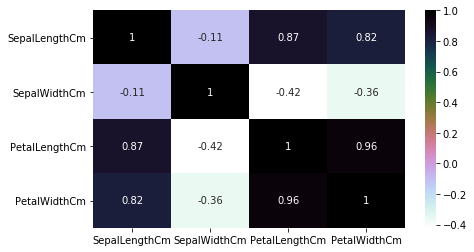

In [43]:
#visualize the correlation
plt.figure(figsize=(7,4)) 
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

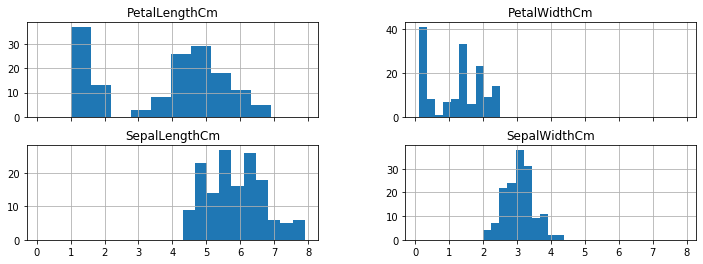

In [44]:
fig, ax=plt.subplots(2,2,sharex=True,figsize=(12,4))
data.hist(figsize=(8,4), ax=ax)
plt.show()

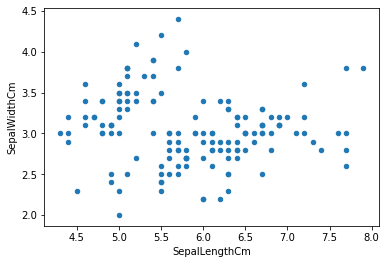

In [49]:
data.plot(kind="scatter",x="SepalLengthCm",y="SepalWidthCm")

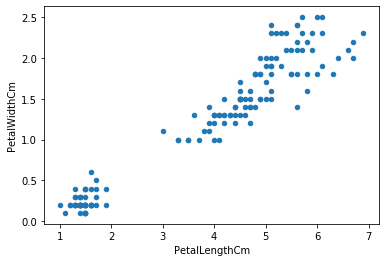

In [50]:
data.plot(kind="scatter",x="PetalLengthCm",y="PetalWidthCm")

### From the Above Pictorial Representation the Petal Length and Width are following a linear trend, whereas Sepal Length and Width are non-lineara.

###Wew will consider all the four parameters in building the Logistic Regression model, 
###Split The Data into Training And Testing Dataset

In [58]:
y_label=data['Species']  #label column
x_features=data.drop('Species',axis=1)  #input columns

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_features, y_label,test_size=0.2,random_state=30)

In [71]:
print(x_train.shape,x_test.shape,y_train.shape, y_test.shape)  # shape of each item

(120, 4) (30, 4) (120,) (30,)


In [72]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
model = LogisticRegression()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.9666666666666667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [73]:
print(prediction[0:5], y_test[0:5])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor'] 20         Iris-setosa
5          Iris-setosa
3          Iris-setosa
101     Iris-virginica
82     Iris-versicolor
Name: Species, dtype: object


In [74]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cnfs_mtrx = confusion_matrix(y_test,prediction)

In [75]:
cnfs_mtrx

array([[12,  0,  0],
       [ 0,  8,  1],
       [ 0,  0,  9]], dtype=int64)

In [77]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30

